<a href="https://colab.research.google.com/github/Nidzoki/PMFSTMachineLearning/blob/main/Strojno_projekt_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predviđanje Airbnb Cijena: Linearna Regresija vs Regresija slučajnom šumom
---

- Dataset: [AirBnB](https://www.kaggle.com/datasets/youssefkhaled117/airbnb)

### Instaliranje libraryja

In [ ]:
!pip install kagglehub

### Imports

In [ ]:

import kagglehub
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Dataset download

In [ ]:
path = kagglehub.dataset_download("youssefkhaled117/airbnb")
print("Path to dataset files:", path)
print(os.listdir(path))
filename = os.listdir(path)[0]

Using Colab cache for faster access to the 'airbnb' dataset.
Path to dataset files: /kaggle/input/airbnb
['final_data_with_changes.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, filename))

### Eksploratorna analiza podataka

In [ ]:
df.shape

(51707, 36)

In [ ]:
df.head()

,price_total,room_type,is_shared_room,is_private_room,max_guests,is_superhost,is_multi_listing,is_business_listing,cleanliness_score,guest_satisfaction_score,...,Safety_Index,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC,proximity_index
0,93.788179,Private room,0,1,2.0,1,1,0,10.0,93.0,...,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29,0.225448
1,822.169053,Private room,0,1,4.0,1,0,0,8.0,85.0,...,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29,1.113955
2,104.351833,Private room,0,1,2.0,1,0,1,9.0,87.0,...,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29,0.184291
3,1031.986037,Private room,0,1,4.0,1,0,1,9.0,90.0,...,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29,1.110275
4,1078.983564,Private room,0,1,2.0,0,0,0,10.0,98.0,...,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29,1.036462


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_total                     51707 non-null  float64
 1   room_type                       51707 non-null  object 
 2   is_shared_room                  51707 non-null  int64  
 3   is_private_room                 51707 non-null  int64  
 4   max_guests                      51707 non-null  float64
 5   is_superhost                    51707 non-null  int64  
 6   is_multi_listing                51707 non-null  int64  
 7   is_business_listing             51707 non-null  int64  
 8   cleanliness_score               51707 non-null  float64
 9   guest_satisfaction_score        51707 non-null  float64
 10  num_bedrooms                    51707 non-null  int64  
 11  distance_city_center            51707 non-null  float64
 12  distance_metro                  

In [ ]:
df.describe()

,price_total,is_shared_room,is_private_room,max_guests,is_superhost,is_multi_listing,is_business_listing,cleanliness_score,guest_satisfaction_score,num_bedrooms,...,Safety_Index,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC,proximity_index
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,...,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,368.620987,0.007078,0.361518,3.161661,0.744097,0.291353,0.350204,9.390624,92.628232,1.15876,...,53.630166,2611.825205,16.499909,1.780522,228.501078,1518.019100,1105.005234,2692.939883,1945.483547,0.597525
std,509.717535,0.083835,0.480445,1.298545,0.436372,0.454390,0.477038,0.954868,8.945531,0.62741,...,10.789932,1179.745274,3.722901,0.737444,73.984517,700.342853,512.655685,1034.869468,830.160945,0.248780
min,7.657682,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.00000,...,42.000000,1164.490000,10.470000,0.900000,134.930000,614.420000,519.210000,1142.700000,946.390000,0.047455
25%,157.537810,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.00000,...,44.400000,1410.600000,15.000000,1.150000,184.560000,1280.450000,820.590000,2162.900000,1541.670000,0.432760
50%,260.500210,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,10.000000,95.000000,1.00000,...,52.700000,2102.820000,15.000000,1.500000,187.370000,1387.500000,1036.000000,2431.820000,1633.330000,0.575571
75%,433.668497,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,10.000000,99.000000,1.00000,...,66.100000,3305.140000,18.250000,2.800000,291.200000,1398.590000,1061.180000,3088.460000,2145.000000,0.725286
max,43955.618778,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.00000,...,74.300000,4502.100000,23.010000,3.000000,347.110000,2788.440000,2029.850000,4402.560000,3416.390000,1.820960


In [ ]:
print("Missing values: ", df.isna().sum().sum())
print("Duplicate rows: ", df.duplicated().sum())

Missing values:  0
Duplicate rows:  0


In [ ]:
### razdvajanje stupaca po tipu zbog preglednosti i lakše analize

int_cols = df.select_dtypes(include="int64").columns
float_cols = df.select_dtypes(include="float64").columns
object_cols = df.select_dtypes(include="object").columns

In [ ]:
df[int_cols].describe()

,is_shared_room,is_private_room,is_superhost,is_multi_listing,is_business_listing,num_bedrooms
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000
mean,0.007078,0.361518,0.744097,0.291353,0.350204,1.15876
std,0.083835,0.480445,0.436372,0.454390,0.477038,0.62741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,10.00000


In [ ]:
df[float_cols].describe()

,price_total,max_guests,cleanliness_score,guest_satisfaction_score,distance_city_center,distance_metro,attraction_index,attraction_index_norm,restaurant_index,restaurant_index_norm,...,Safety_Index,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC,proximity_index
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,...,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,368.620987,3.161661,9.390624,92.628232,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,...,53.630166,2611.825205,16.499909,1.780522,228.501078,1518.019100,1105.005234,2692.939883,1945.483547,0.597525
std,509.717535,1.298545,0.954868,8.945531,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,...,10.789932,1179.745274,3.722901,0.737444,73.984517,700.342853,512.655685,1034.869468,830.160945,0.248780
min,7.657682,2.000000,2.000000,20.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,...,42.000000,1164.490000,10.470000,0.900000,134.930000,614.420000,519.210000,1142.700000,946.390000,0.047455
25%,157.537810,2.000000,9.000000,90.000000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,...,44.400000,1410.600000,15.000000,1.150000,184.560000,1280.450000,820.590000,2162.900000,1541.670000,0.432760
50%,260.500210,3.000000,10.000000,95.000000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,...,52.700000,2102.820000,15.000000,1.500000,187.370000,1387.500000,1036.000000,2431.820000,1633.330000,0.575571
75%,433.668497,4.000000,10.000000,99.000000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,...,66.100000,3305.140000,18.250000,2.800000,291.200000,1398.590000,1061.180000,3088.460000,2145.000000,0.725286
max,43955.618778,6.000000,10.000000,100.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,...,74.300000,4502.100000,23.010000,3.000000,347.110000,2788.440000,2029.850000,4402.560000,3416.390000,1.820960


In [ ]:
df[object_cols].describe()

,room_type,city,day_type,district,state,country_code,country_name
count,51707,51707,51707,51707,51707,51707,51707
unique,3,10,2,29,15,11,11
top,Entire home/apt,London,weekend,Greater London,England,GB,United Kingdom
freq,32648,9993,26207,9993,9993,9993,9993


### EDA findings





* Redaka:51707
* Stupaca:36
* dtypes: float64(23), int64(6) (od toga 5 bool i 1 cijeli broj (`num_bedrooms`)), object(7)
* nema nedostajućih vrijednosti
* nema duplikata

### !!! Odluka
---
Konvertiranje vrijednosti iz `num_bedrooms` iz int u float tako da samo bool vrijednosti ostanu tipa int

In [ ]:
df['num_bedrooms'] = df['num_bedrooms'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_total                     51707 non-null  float64
 1   room_type                       51707 non-null  object 
 2   is_shared_room                  51707 non-null  int64  
 3   is_private_room                 51707 non-null  int64  
 4   max_guests                      51707 non-null  float64
 5   is_superhost                    51707 non-null  int64  
 6   is_multi_listing                51707 non-null  int64  
 7   is_business_listing             51707 non-null  int64  
 8   cleanliness_score               51707 non-null  float64
 9   guest_satisfaction_score        51707 non-null  float64
 10  num_bedrooms                    51707 non-null  float64
 11  distance_city_center            51707 non-null  float64
 12  distance_metro                  

#### Ažuriranje podataka o stupcima

In [ ]:
float_cols = df.select_dtypes(include="float64").columns
int_cols = df.select_dtypes(include="int64").columns

In [ ]:
df[float_cols.drop(['Crime_Index', 'Safety_Index', 'Monthly_Average_Net_salary', 'Meal_at_Inexpensive_Restaurant', 'Taxi_price_per_Km', 'Monthly_Basic_Utilities', 'Monthly_Rent_One_Bedroom_CC', 'Monthly_Rent_One_Bedroom_OCC', 'Monthly_Rent_Three_Bedroom_CC', 'Monthly_Rent_Three_Bedroom_OCC', 'proximity_index'])].describe()

,price_total,max_guests,cleanliness_score,guest_satisfaction_score,num_bedrooms,distance_city_center,distance_metro,attraction_index,attraction_index_norm,restaurant_index,restaurant_index_norm,longitude,latitude
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,368.620987,3.161661,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,509.717535,1.298545,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,7.657682,2.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,157.537810,2.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,260.500210,3.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,433.668497,4.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,43955.618778,6.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [ ]:
df[['Crime_Index', 'Safety_Index', 'Monthly_Average_Net_salary', 'Meal_at_Inexpensive_Restaurant', 'Taxi_price_per_Km', 'Monthly_Basic_Utilities', 'Monthly_Rent_One_Bedroom_CC', 'Monthly_Rent_One_Bedroom_OCC', 'Monthly_Rent_Three_Bedroom_CC', 'Monthly_Rent_Three_Bedroom_OCC', 'proximity_index']].describe()

,Crime_Index,Safety_Index,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC,proximity_index
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,46.369834,53.630166,2611.825205,16.499909,1.780522,228.501078,1518.019100,1105.005234,2692.939883,1945.483547,0.597525
std,10.789932,10.789932,1179.745274,3.722901,0.737444,73.984517,700.342853,512.655685,1034.869468,830.160945,0.248780
min,25.700000,42.000000,1164.490000,10.470000,0.900000,134.930000,614.420000,519.210000,1142.700000,946.390000,0.047455
25%,33.900000,44.400000,1410.600000,15.000000,1.150000,184.560000,1280.450000,820.590000,2162.900000,1541.670000,0.432760
50%,47.300000,52.700000,2102.820000,15.000000,1.500000,187.370000,1387.500000,1036.000000,2431.820000,1633.330000,0.575571
75%,55.600000,66.100000,3305.140000,18.250000,2.800000,291.200000,1398.590000,1061.180000,3088.460000,2145.000000,0.725286
max,58.000000,74.300000,4502.100000,23.010000,3.000000,347.110000,2788.440000,2029.850000,4402.560000,3416.390000,1.820960


### Čišćenje podataka

In [ ]:
unclean_df = df.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x7d66b0f09760>,
 'caps': [<matplotlib.lines.Line2D at 0x7d66b0f09c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d66b20ba480>],
 'medians': [<matplotlib.lines.Line2D at 0x7d66b0f0a1e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d66b0f0a4b0>],
 'means': []}

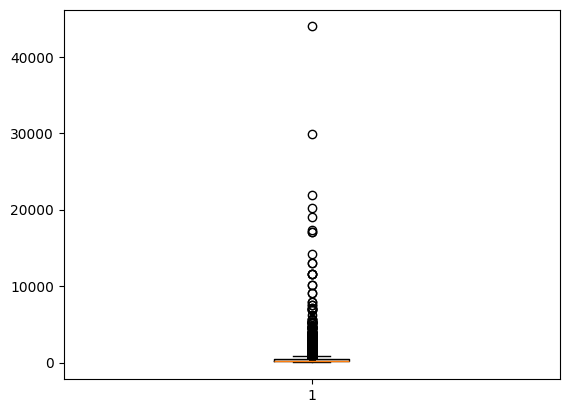

In [ ]:
plt.boxplot(df['price_total'])

Odluka: uklanjanje outliera, odnosno, vrijednosti stupca price_total koji su iznad 1000.

In [ ]:
n_before = df.shape[0]
df = df.drop(df[df['price_total'] > 1000].index)
print(f"Uklonjeno je {n_before-df.shape[0]} redova")

Uklonjeno je 2430 redova


{'whiskers': [<matplotlib.lines.Line2D at 0x7d66b0f6f620>,
 'caps': [<matplotlib.lines.Line2D at 0x7d66b0f6fbf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d66b0f6f380>],
 'medians': [<matplotlib.lines.Line2D at 0x7d66b0f940b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d66b0f94380>],
 'means': []}

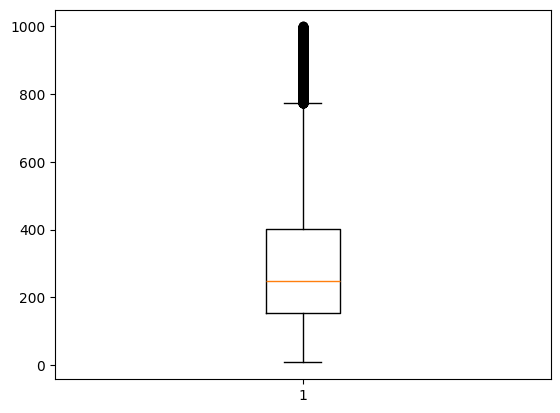

In [ ]:
plt.boxplot(df['price_total'])

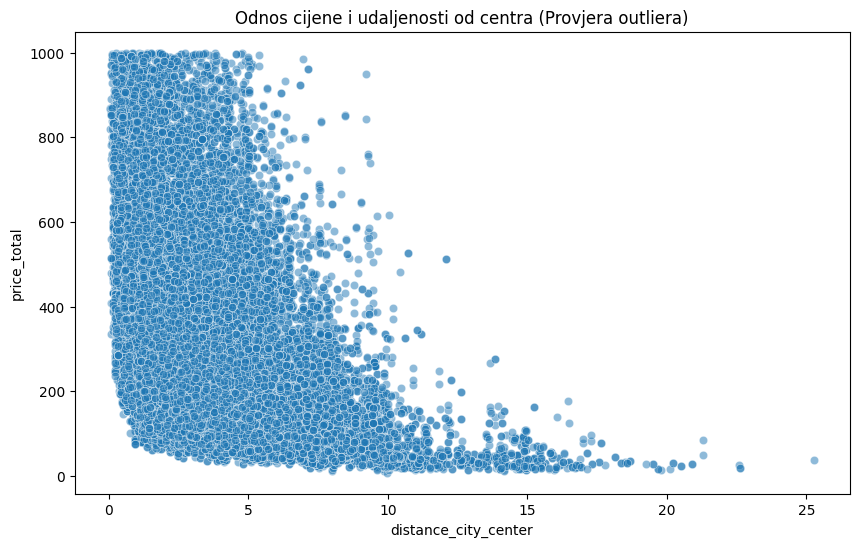

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='distance_city_center', y='price_total', alpha=0.5)
plt.title('Odnos cijene i udaljenosti od centra (Provjera outliera)')
plt.show()

In [ ]:
df[df['price_total']< 20]

,price_total,room_type,is_shared_room,is_private_room,max_guests,is_superhost,is_multi_listing,is_business_listing,cleanliness_score,guest_satisfaction_score,...,Safety_Index,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC,proximity_index
11184,14.469227,Private room,0,1,2.0,1,0,0,10.0,100.0,...,55.5,3136.14,15.00,2.80,347.11,1298.45,923.15,2431.82,1770.45,0.079769
11277,19.630267,Private room,0,1,2.0,1,0,0,9.0,92.0,...,55.5,3136.14,15.00,2.80,347.11,1298.45,923.15,2431.82,1770.45,0.089648
11390,14.952431,Private room,0,1,2.0,0,0,0,10.0,98.0,...,55.5,3136.14,15.00,2.80,347.11,1298.45,923.15,2431.82,1770.45,0.077108
11402,13.161896,Private room,0,1,2.0,0,0,0,9.0,96.0,...,55.5,3136.14,15.00,2.80,347.11,1298.45,923.15,2431.82,1770.45,0.088145
11417,16.521448,Private room,0,1,2.0,0,0,0,10.0,98.0,...,55.5,3136.14,15.00,2.80,347.11,1298.45,923.15,2431.82,1770.45,0.075624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29464,16.646936,Private room,0,1,2.0,1,0,0,10.0,100.0,...,44.4,4260.76,23.01,2.85,333.23,2788.44,2029.85,4402.56,3416.39,0.088746
29572,17.503068,Private room,0,1,2.0,0,0,0,9.0,97.0,...,44.4,4260.76,23.01,2.85,333.23,2788.44,2029.85,4402.56,3416.39,0.095888
29631,15.365807,Private room,0,1,2.0,1,0,0,10.0,100.0,...,44.4,4260.76,23.01,2.85,333.23,2788.44,2029.85,4402.56,3416.39,0.092623
30609,18.312900,Private room,0,1,2.0,1,1,0,7.0,62.0,...,44.4,4260.76,23.01,2.85,333.23,2788.44,2029.85,4402.56,3416.39,0.103175


In [ ]:
df[(df['distance_city_center'] > 15) & (df['price_total'] > 150)]

,price_total,room_type,is_shared_room,is_private_room,max_guests,is_superhost,is_multi_listing,is_business_listing,cleanliness_score,guest_satisfaction_score,...,Safety_Index,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC,proximity_index
10320,176.869799,Entire home/apt,0,0,6.0,1,0,0,10.0,100.0,...,55.5,3136.14,15.0,2.8,347.11,1298.45,923.15,2431.82,1770.45,0.103422
11460,162.336772,Entire home/apt,0,0,2.0,1,0,0,10.0,100.0,...,55.5,3136.14,15.0,2.8,347.11,1298.45,923.15,2431.82,1770.45,0.296954
12660,162.335657,Entire home/apt,0,0,2.0,1,0,0,10.0,100.0,...,55.5,3136.14,15.0,2.8,347.11,1298.45,923.15,2431.82,1770.45,0.296952


In [ ]:
df[(df['num_bedrooms'] == 1) & (df['price_total'] > 800)]

,price_total,room_type,is_shared_room,is_private_room,max_guests,is_superhost,is_multi_listing,is_business_listing,cleanliness_score,guest_satisfaction_score,...,Safety_Index,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC,proximity_index
1,822.169053,Private room,0,1,4.0,1,0,0,8.0,85.0,...,74.3,4502.1,20.50,3.0,262.0,2178.68,1701.26,3725.50,2785.29,1.113955
51,845.361449,Private room,0,1,2.0,1,0,1,9.0,95.0,...,74.3,4502.1,20.50,3.0,262.0,2178.68,1701.26,3725.50,2785.29,1.233549
55,841.641716,Private room,0,1,2.0,1,0,1,9.0,95.0,...,74.3,4502.1,20.50,3.0,262.0,2178.68,1701.26,3725.50,2785.29,1.228121
73,916.487414,Shared room,1,0,2.0,0,0,0,10.0,96.0,...,74.3,4502.1,20.50,3.0,262.0,2178.68,1701.26,3725.50,2785.29,0.891993
83,840.642384,Entire home/apt,0,0,2.0,1,0,0,9.0,96.0,...,74.3,4502.1,20.50,3.0,262.0,2178.68,1701.26,3725.50,2785.29,0.612209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51459,886.473703,Entire home/apt,0,0,2.0,1,0,1,9.0,91.0,...,71.6,3135.2,18.25,1.9,291.2,1082.80,763.71,2063.57,1302.78,1.107662
51596,965.334475,Entire home/apt,0,0,2.0,1,0,1,9.0,95.0,...,71.6,3135.2,18.25,1.9,291.2,1082.80,763.71,2063.57,1302.78,1.364236
51633,898.927209,Entire home/apt,0,0,6.0,1,0,1,10.0,95.0,...,71.6,3135.2,18.25,1.9,291.2,1082.80,763.71,2063.57,1302.78,0.911941
51688,847.504813,Entire home/apt,0,0,4.0,1,1,0,9.0,89.0,...,71.6,3135.2,18.25,1.9,291.2,1082.80,763.71,2063.57,1302.78,1.236239


In [ ]:
print(df[(df['num_bedrooms'] == 1) & (df['price_total'] > 800)]['city'].value_counts())

city
Paris        284
London       173
Amsterdam     90
Barcelona     71
Lisbon        69
Vienna        43
Budapest      23
Athens        18
Rome          16
Berlin        13
Name: count, dtype: int64


/tmp/ipython-input-115467382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='city', y='price_total', palette='Set3')


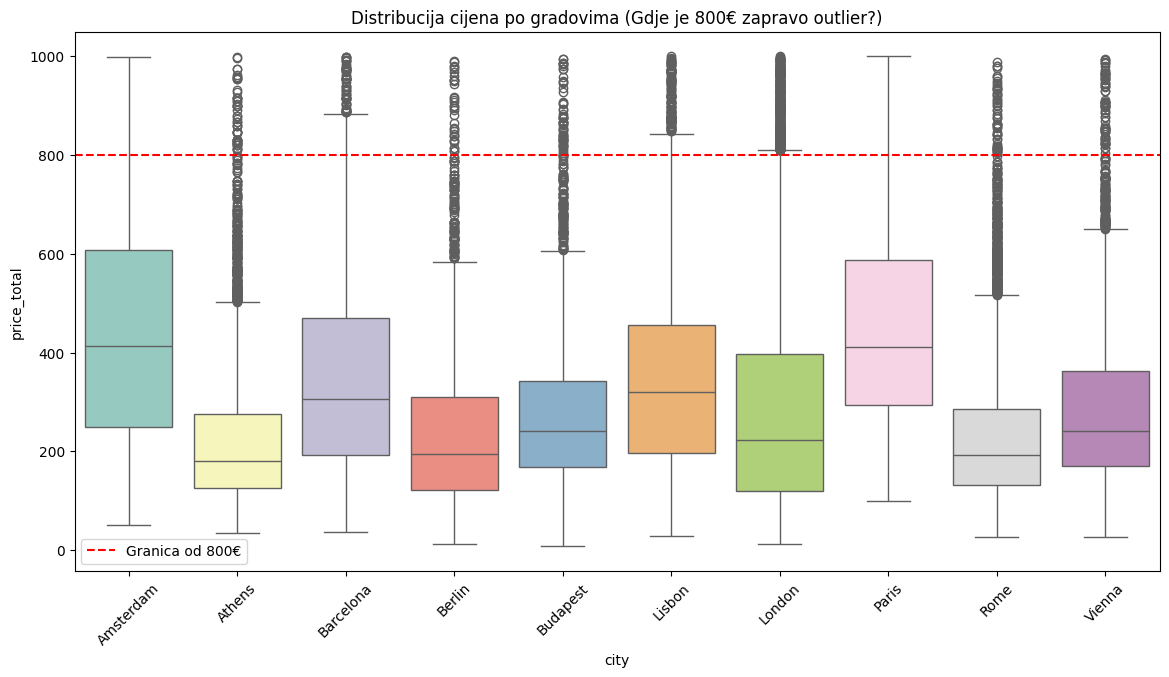

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='city', y='price_total', palette='Set3')
plt.axhline(800, color='red', linestyle='--', label='Granica od 800€')
plt.title('Distribucija cijena po gradovima (Gdje je 800€ zapravo outlier?)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Odluka: Brišemo ekstremne jednosobne stanove u gradovima s nižim standardom i postavljamo minimalnu cijenu (da izbacimo "parking mjesta" od 5€)

In [ ]:
outlier_cities = ['Athens', 'Budapest', 'Rome', 'Berlin', 'Vienna']

n_before = df.shape[0]
df = df[~((df['city'].isin(outlier_cities)) & (df['num_bedrooms'] <= 1) & (df['price_total'] > 600))]

df = df[df['price_total'] > 20]

print(f"Nakon finog čišćenja ostalo nam je {len(df)} redova. Uklonjeno je {n_before-df.shape[0]} redova.")

Nakon finog čišćenja ostalo nam je 48685 redova. Uklonjeno je 592 redova.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48685 entries, 0 to 51706
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_total                     48685 non-null  float64
 1   room_type                       48685 non-null  object 
 2   is_shared_room                  48685 non-null  int64  
 3   is_private_room                 48685 non-null  int64  
 4   max_guests                      48685 non-null  float64
 5   is_superhost                    48685 non-null  int64  
 6   is_multi_listing                48685 non-null  int64  
 7   is_business_listing             48685 non-null  int64  
 8   cleanliness_score               48685 non-null  float64
 9   guest_satisfaction_score        48685 non-null  float64
 10  num_bedrooms                    48685 non-null  float64
 11  distance_city_center            48685 non-null  float64
 12  distance_metro                  48685

Daljnjom analizom utvrđeno je postojanje stupaca poput `restaurant_index` i `restaurant_index_norm` koji su tehnički isti, samo je jedan od njih normaliziran. Odlučeno je zadržati samo takve normalizirane stupce.

In [ ]:
df = df.drop(['restaurant_index', 'attraction_index'], axis=1)
float_cols = df.select_dtypes(include="float64").columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48685 entries, 0 to 51706
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_total                     48685 non-null  float64
 1   room_type                       48685 non-null  object 
 2   is_shared_room                  48685 non-null  int64  
 3   is_private_room                 48685 non-null  int64  
 4   max_guests                      48685 non-null  float64
 5   is_superhost                    48685 non-null  int64  
 6   is_multi_listing                48685 non-null  int64  
 7   is_business_listing             48685 non-null  int64  
 8   cleanliness_score               48685 non-null  float64
 9   guest_satisfaction_score        48685 non-null  float64
 10  num_bedrooms                    48685 non-null  float64
 11  distance_city_center            48685 non-null  float64
 12  distance_metro                  48685

Isto tako, stupci `country_code` i `country_name` su redundantni jer nam govore istu stvar, stoga se izbacuje stupac `country_code`

In [ ]:
df = df.drop('country_code', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48685 entries, 0 to 51706
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_total                     48685 non-null  float64
 1   room_type                       48685 non-null  object 
 2   is_shared_room                  48685 non-null  int64  
 3   is_private_room                 48685 non-null  int64  
 4   max_guests                      48685 non-null  float64
 5   is_superhost                    48685 non-null  int64  
 6   is_multi_listing                48685 non-null  int64  
 7   is_business_listing             48685 non-null  int64  
 8   cleanliness_score               48685 non-null  float64
 9   guest_satisfaction_score        48685 non-null  float64
 10  num_bedrooms                    48685 non-null  float64
 11  distance_city_center            48685 non-null  float64
 12  distance_metro                  48685

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48685 entries, 0 to 51706
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price_total                     48685 non-null  float64
 1   room_type                       48685 non-null  object 
 2   is_shared_room                  48685 non-null  int64  
 3   is_private_room                 48685 non-null  int64  
 4   max_guests                      48685 non-null  float64
 5   is_superhost                    48685 non-null  int64  
 6   is_multi_listing                48685 non-null  int64  
 7   is_business_listing             48685 non-null  int64  
 8   cleanliness_score               48685 non-null  float64
 9   guest_satisfaction_score        48685 non-null  float64
 10  num_bedrooms                    48685 non-null  float64
 11  distance_city_center            48685 non-null  float64
 12  distance_metro                  48685

In [ ]:
df['country_name'].value_counts()

,count
country_name,
United Kingdom,9340
France,5916
Portugal,5581
Greece,5163
Holy See (Vatican City State),4526
Italy,4356
Hungary,3848
Austria,3316
Spain,2644


In [ ]:
df['district'].value_counts()

,count
district,
Greater London,9340
Nomarchia Athinas,5163
Lisbon,4536
Rome,4526
Citta metropolitana di Roma Capitale,4356
Budapest,3848
Paris,3107
Wien Stadt,3007
Provincia de Barcelona,2644


In [ ]:
df.groupby('city')['district'].unique()

,district
city,
Amsterdam,"[Gemeente Landsmeer, Gemeente Amsterdam, Gemee..."
Athens,[Nomarchia Athinas]
Barcelona,[Provincia de Barcelona]
Berlin,[Berlin]
Budapest,[Budapest]
Lisbon,"[Lisbon, Loures, Oeiras, Almada, Odivelas]"
London,[Greater London]
Paris,"[Paris, Departement des Hauts-de-Seine, Depart..."
Rome,"[Rome, Citta metropolitana di Roma Capitale]"


Odluka: uklanjanje stupaca `district` i `state`:
* district – Redundantan pored `city` i koordinata.

* state – Preveliko preklapanje s `country_name` i `city`.

In [ ]:
df = df.drop(['district', 'state'], axis=1)

In [ ]:
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,30070
Private room,18257
Shared room,358


Odluka: uklanjanje stupaca `is_shared_room` i `is_private_room`. Razlog: ti podaci se već nalaze u stupcu `room_type` što ove stupce čini redundantnima.

In [ ]:
df = df.drop(['is_shared_room', 'is_private_room'], axis=1)

### Analiza korelacije i VIF(Variance Inflation Factor)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

    return vif_data.sort_values(by="VIF", ascending=False)


In [ ]:
print(calculate_vif(df[float_cols].drop('price_total', axis=1)))

                           feature           VIF
19  Monthly_Rent_Three_Bedroom_OCC  6.760903e+06
17    Monthly_Rent_One_Bedroom_OCC  4.868026e+06
11                    Safety_Index  2.396689e+06
18   Monthly_Rent_Three_Bedroom_CC  2.100646e+06
10                     Crime_Index  1.034917e+06
16     Monthly_Rent_One_Bedroom_CC  8.648575e+05
13  Meal_at_Inexpensive_Restaurant  2.023897e+05
12      Monthly_Average_Net_salary  1.611276e+05
8                        longitude  6.338716e+04
9                         latitude  6.294097e+04
14               Taxi_price_per_Km  3.180500e+04
15         Monthly_Basic_Utilities  2.912830e+04
7            restaurant_index_norm  3.957422e+00
4             distance_city_center  3.853462e+00
20                 proximity_index  3.639838e+00
6            attraction_index_norm  3.251063e+00
5                   distance_metro  2.188744e+00
2         guest_satisfaction_score  2.117029e+00
1                cleanliness_score  2.094470e+00
0                   

<Axes: >

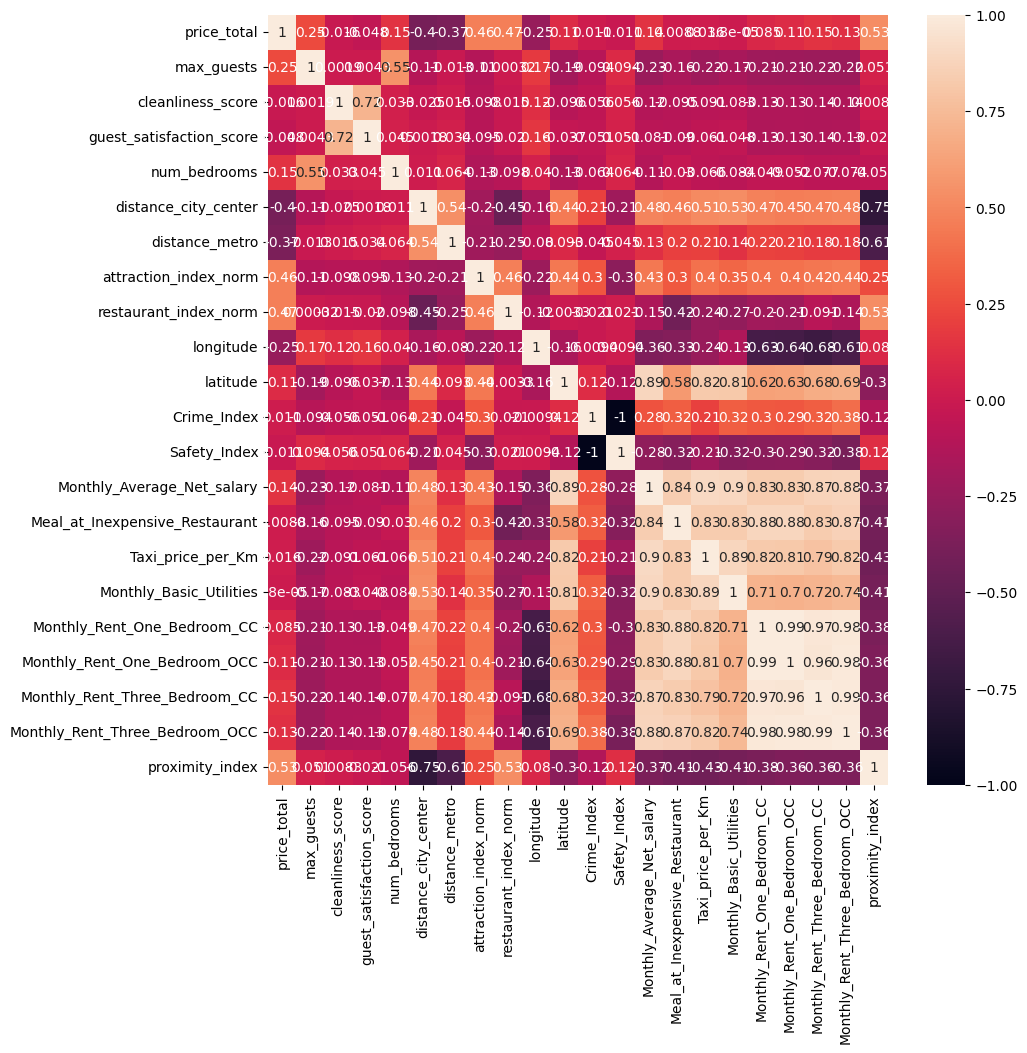

In [ ]:
corr = df[float_cols].corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True)

Uklanjanje `Crime_Index` - razlog: obrnuto proporcionalan stupcu `Safety_Index` što ga čini redundantnim

In [ ]:
df = df.drop('Crime_Index', axis=1)
float_cols = df.select_dtypes(include="float64").columns

In [ ]:
def auto_drop_vif_safe(X, threshold=10.0, exclude_columns=None):
    if exclude_columns is None:
        exclude_columns = []

    current_cols = list(X.columns)
    drop_cols = []
    iteration = 1

    print(f"{'Iteracija':<10} | {'Izbačeni stupac':<30} | {'VIF':>10}")
    print("-" * 60)

    while True:
        vif_list = []
        for i in range(len(current_cols)):
            vif = variance_inflation_factor(X[current_cols].values, i)
            vif_list.append(vif)

        vif_df = pd.DataFrame({'feature': current_cols, 'VIF': vif_list})

        candidate_vif = vif_df[~vif_df['feature'].isin(exclude_columns)]

        if candidate_vif.empty:
            break

        row_max = candidate_vif.loc[candidate_vif['VIF'].idxmax()]
        max_vif = row_max['VIF']
        worst_feature = row_max['feature']

        if max_vif > threshold:
            print(f"{iteration:<10} | {worst_feature:<30} | {max_vif:>10.2f}")
            drop_cols.append(worst_feature)
            current_cols.remove(worst_feature)
            iteration += 1
        else:
            break

    print("-" * 60)
    print(f"KRAJ: Preostalo stupaca: {len(current_cols)}")
    return drop_cols

In [ ]:
cols_to_exclude = ['cleanliness_score', 'guest_satisfaction_score', 'num_bedrooms', 'longitude', 'latitude', 'Safety_Index', 'max_guests']

cols_to_drop = auto_drop_vif_safe(df[float_cols], exclude_columns=cols_to_exclude)

Iteracija  | Izbačeni stupac                |        VIF
------------------------------------------------------------
1          | Monthly_Rent_Three_Bedroom_OCC | 41792543.62
2          | Monthly_Rent_One_Bedroom_CC    |    2267.49
3          | Meal_at_Inexpensive_Restaurant |     377.07
4          | Monthly_Rent_Three_Bedroom_CC  |     299.09
5          | Monthly_Average_Net_salary     |      95.66
6          | Taxi_price_per_Km              |      72.32
7          | Monthly_Basic_Utilities        |      52.39
8          | Monthly_Rent_One_Bedroom_OCC   |      37.30
9          | proximity_index                |      20.45
------------------------------------------------------------
KRAJ: Preostalo stupaca: 12


In [ ]:
print("Cols to drop: ", cols_to_drop)

df = df.drop(cols_to_drop, axis=1)
float_cols = df.select_dtypes(include="float64").columns

Cols to drop:  ['Monthly_Rent_Three_Bedroom_OCC', 'Monthly_Rent_One_Bedroom_CC', 'Meal_at_Inexpensive_Restaurant', 'Monthly_Rent_Three_Bedroom_CC', 'Monthly_Average_Net_salary', 'Taxi_price_per_Km', 'Monthly_Basic_Utilities', 'Monthly_Rent_One_Bedroom_OCC', 'proximity_index']


<Axes: >

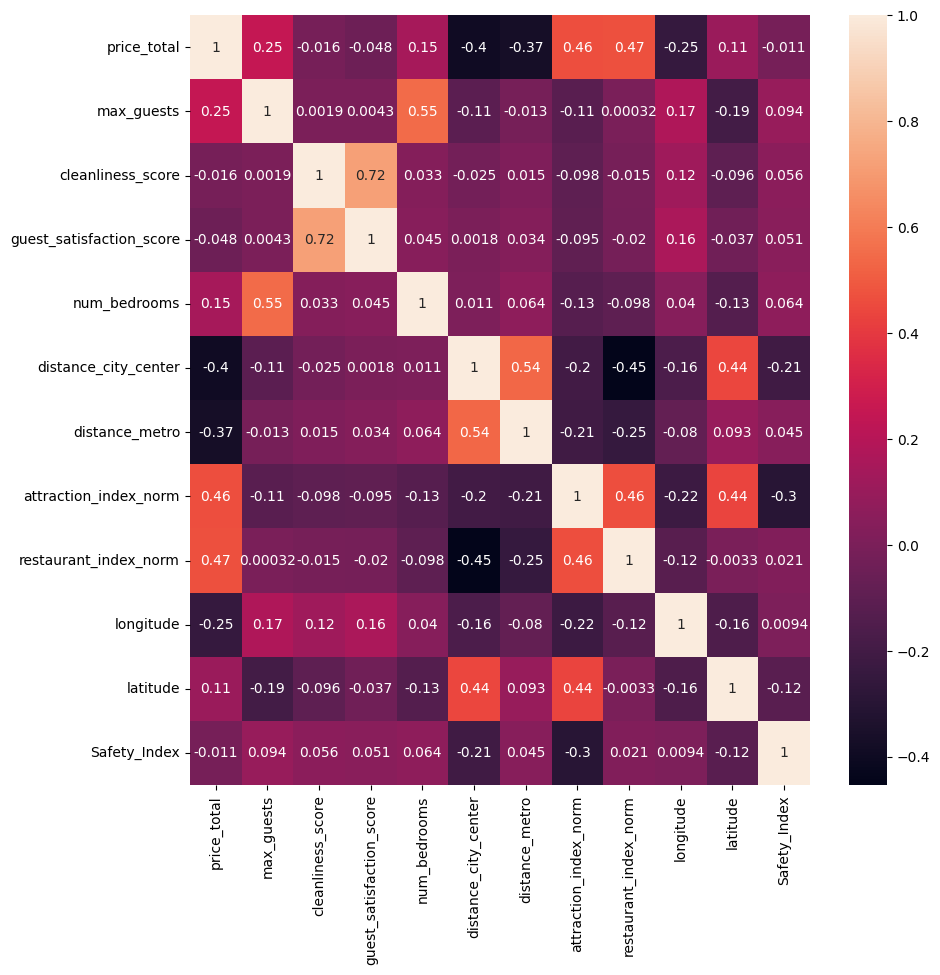

In [ ]:
corr = df[float_cols].corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True)

Uklanjanjem stupaca koji su imali najveću VIF vrijednost, dobivena je zadovoljavajuća matrica korelacije. Stupci koji se smatraju važnima u predviđanju cijene su preskočeni u procesu.

### Enkodiranje kategoričkih stupaca

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48685 entries, 0 to 51706
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price_total               48685 non-null  float64
 1   room_type                 48685 non-null  object 
 2   max_guests                48685 non-null  float64
 3   is_superhost              48685 non-null  int64  
 4   is_multi_listing          48685 non-null  int64  
 5   is_business_listing       48685 non-null  int64  
 6   cleanliness_score         48685 non-null  float64
 7   guest_satisfaction_score  48685 non-null  float64
 8   num_bedrooms              48685 non-null  float64
 9   distance_city_center      48685 non-null  float64
 10  distance_metro            48685 non-null  float64
 11  attraction_index_norm     48685 non-null  float64
 12  restaurant_index_norm     48685 non-null  float64
 13  longitude                 48685 non-null  float64
 14  latitude   

In [ ]:
df = pd.get_dummies(df, columns=['room_type', 'city', 'day_type', 'country_name'], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48685 entries, 0 to 51706
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   price_total                                 48685 non-null  float64
 1   max_guests                                  48685 non-null  float64
 2   is_superhost                                48685 non-null  int64  
 3   is_multi_listing                            48685 non-null  int64  
 4   is_business_listing                         48685 non-null  int64  
 5   cleanliness_score                           48685 non-null  float64
 6   guest_satisfaction_score                    48685 non-null  float64
 7   num_bedrooms                                48685 non-null  float64
 8   distance_city_center                        48685 non-null  float64
 9   distance_metro                              48685 non-null  float64
 10  attraction_inde

### Treniranje modela

In [ ]:
X = df.drop('price_total', axis=1)
y = df['price_total']

X_unclean = pd.get_dummies(unclean_df.drop('price_total', axis=1), drop_first=True)
y_unclean = unclean_df['price_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(
    X_unclean, y_unclean, test_size=0.2, random_state=42
)

In [ ]:
lr_model = LinearRegression().fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

lr_unclean = LinearRegression().fit(X_train_un, y_train_un)
rf_unclean = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_un, y_train_un)

### Evaluacija

In [ ]:

def evaluate(model, X_test, y_test, name):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"--- {name} ---")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}€")
    print(f"RMSE: {rmse:.2f}€\n")

In [ ]:
evaluate(lr_unclean, X_test_un, y_test_un, "Linear Regression (Unclean dataset)")
evaluate(rf_unclean, X_test_un, y_test_un, "Random Forest (Unclean dataset)")

evaluate(lr_model, X_test, y_test, "Linear Regression")
evaluate(rf_model, X_test, y_test, "Random Forest")

--- Linear Regression (Unclean dataset) ---
R2 Score: 0.3655
MAE: 142.32€
RMSE: 382.65€

--- Random Forest (Unclean dataset) ---
R2 Score: 0.6844
MAE: 73.55€
RMSE: 269.85€

--- Linear Regression ---
R2 Score: 0.6345
MAE: 88.53€
RMSE: 119.95€

--- Random Forest ---
R2 Score: 0.8614
MAE: 47.06€
RMSE: 73.86€



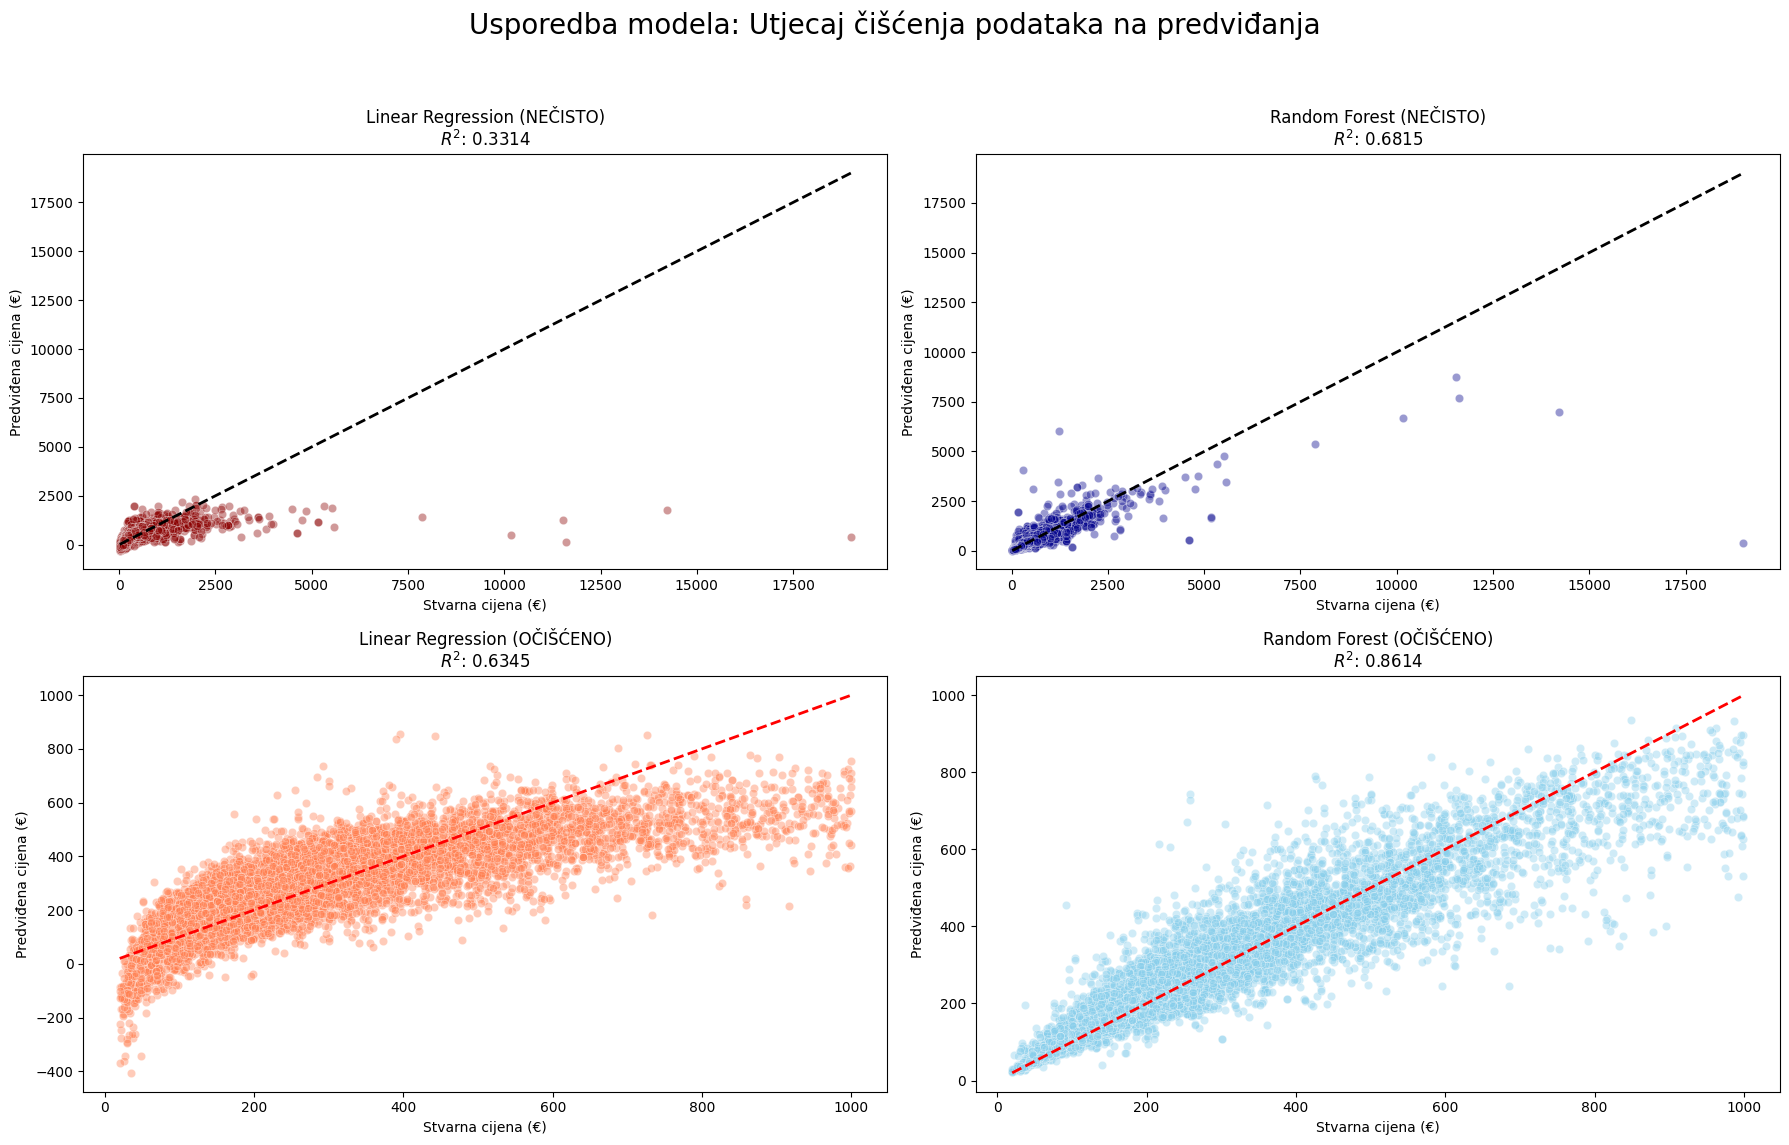

In [ ]:
lr_un_preds = lr_unclean.predict(X_test_un)
rf_un_preds = rf_unclean.predict(X_test_un)

lr_clean_preds = lr_model.predict(X_test)
rf_clean_preds = rf_model.predict(X_test)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
((ax1, ax2), (ax3, ax4)) = axes

# LR Nečisto
sns.scatterplot(x=y_test_un, y=lr_un_preds, ax=ax1, alpha=0.4, color='darkred')
ax1.plot([y_test_un.min(), y_test_un.max()], [y_test_un.min(), y_test_un.max()], 'k--', lw=2)
ax1.set_title('Linear Regression (NEČISTO)\n$R^2$: 0.3314')
ax1.set_xlabel('Stvarna cijena (€)')
ax1.set_ylabel('Predviđena cijena (€)')

# RF Nečisto
sns.scatterplot(x=y_test_un, y=rf_un_preds, ax=ax2, alpha=0.4, color='darkblue')
ax2.plot([y_test_un.min(), y_test_un.max()], [y_test_un.min(), y_test_un.max()], 'k--', lw=2)
ax2.set_title('Random Forest (NEČISTO)\n$R^2$: 0.6815')
ax2.set_xlabel('Stvarna cijena (€)')
ax2.set_ylabel('Predviđena cijena (€)')

# --- DRUGI RED: OČIŠĆENI PODACI ---

# LR Očišćeno
sns.scatterplot(x=y_test, y=lr_clean_preds, ax=ax3, alpha=0.4, color='coral')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax3.set_title('Linear Regression (OČIŠĆENO)\n$R^2$: 0.6345')
ax3.set_xlabel('Stvarna cijena (€)')
ax3.set_ylabel('Predviđena cijena (€)')

# RF Očišćeno
sns.scatterplot(x=y_test, y=rf_clean_preds, ax=ax4, alpha=0.4, color='skyblue')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax4.set_title('Random Forest (OČIŠĆENO)\n$R^2$: 0.8614')
ax4.set_xlabel('Stvarna cijena (€)')
ax4.set_ylabel('Predviđena cijena (€)')

plt.suptitle('Usporedba modela: Utjecaj čišćenja podataka na predviđanja', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

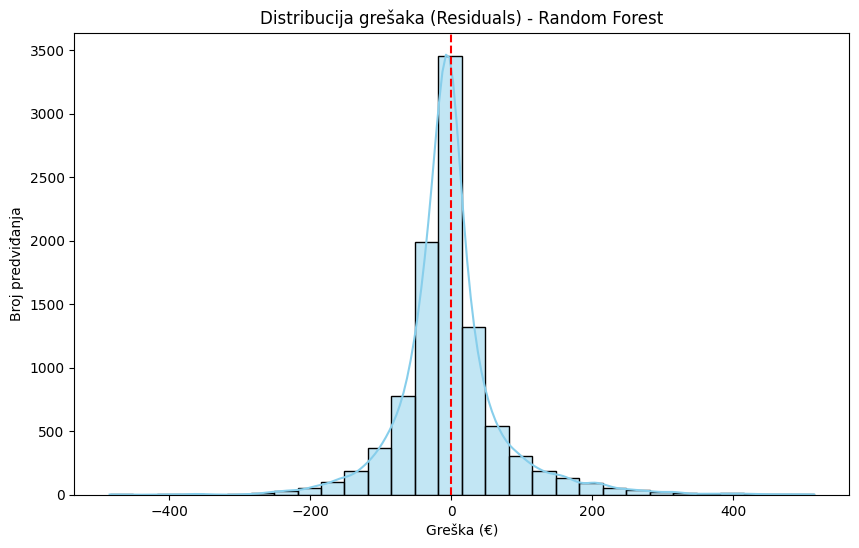

In [ ]:
rf_residuals = y_test - rf_clean_preds

plt.figure(figsize=(10, 6))
sns.histplot(rf_residuals, kde=True, color='skyblue', bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribucija grešaka (Residuals) - Random Forest')
plt.xlabel('Greška (€)')
plt.ylabel('Broj predviđanja')
plt.show()

# Zaključak i evaluacija modela

### 1. Usporedba modela (Baseline vs. Očišćeni podaci)
Provedena analiza jasno pokazuje kritičnu važnost pretprocesuiranja podataka i inženjeringa značajki. Treniranje modela na originalnom, nečišćenom skupu podataka rezultiralo je niskom preciznošću i nepouzdanim predviđanjima zbog prisutnosti ekstremnih outliera (cijene koje su dosezale i do 40.000€).

* **Linearna regresija (LR):** Pokazala je značajan skok u točnosti nakon čišćenja, s **$R^2$ rezultata od 0.3655 na 0.6345**. Ipak, zbog svoje linearne prirode, model teže predviđa kompleksne, nelinearne odnose između lokacije, tipa sobe i cijene.
* **Slučajna šuma (Random Forest - RF):** Pokazala se kao superioran model s konačnim **$R^2$ rezultatom od 0.8614**. To znači da model uspješno objašnjava preko 86% varijacija u cijeni Airbnb smještaja na temelju dostupnih značajki.

### 2. Analiza metričkih pokazatelja (MAE i RMSE)
Čišćenjem podataka "kirurškom" metodom (identifikacija i uklanjanje anomalija specifičnih za pojedine gradove i micanje nerealno niskih cijena), postignuto je drastično smanjenje greške:
* **Srednja apsolutna pogreška (MAE):** Random Forest model u prosjeku griješi za **47.06€**. S obzirom na medijan cijena i kompleksnost europskog tržišta, ovo predstavlja visoku razinu preciznosti.
* **Korijen srednje kvadratne pogreške (RMSE):** Značajno smanjenje RMSE vrijednosti potvrđuje da je model postao stabilan i da su ekstremni promašaji (koji su bili prisutni u "unclean" verziji) svedeni na minimum.


### 3. Zaključak
Projekt dokazuje da je **Random Forest** izrazito moćan alat za predviđanje cijena nekretnina pod uvjetom da su podaci prethodno kvalitetno očišćeni. Za daljnje poboljšanje modela i postizanje $R^2 > 0.90$, preporučuje se:
* Uvođenje temporalnih varijabli (mjesec u godini, dan u tjednu, blizina praznika).
* Dodavanje značajki o specifičnim pogodnostima (npr. balkon, pogled na more, bazen).
* Detaljnija segmentacija po gradskim četvrtima umjesto oslanjanja isključivo na udaljenost od centra.

### Važnost značajki prema slučajnoj šumi

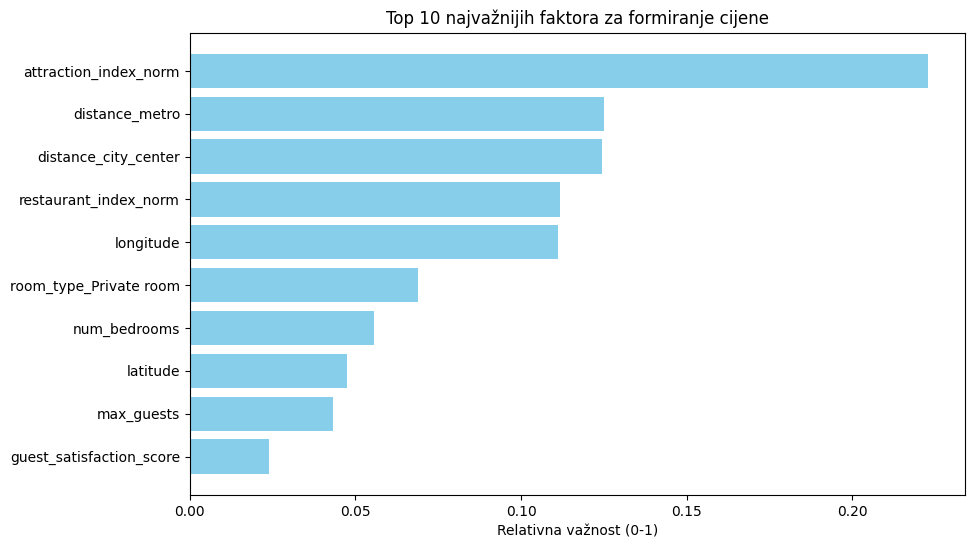

In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 najvažnijih faktora za formiranje cijene')
plt.xlabel('Relativna važnost (0-1)')
plt.show()

### Top 5 promašaja

In [ ]:
residuals = abs(y_test - rf_clean_preds)
top_errors_indices = residuals.sort_values(ascending=False).head(5).index

display_cols = ['city', 'room_type', 'num_bedrooms', 'distance_city_center', 'guest_satisfaction_score', 'price_total']

top_errors_df = unclean_df.loc[top_errors_indices, display_cols].copy()
top_errors_df['predicted_price'] = rf_clean_preds[residuals.sort_values(ascending=False).head(5).index.get_indexer(top_errors_indices)]
top_errors_df['error_euros'] = residuals.loc[top_errors_indices]

print("Top 5 najvećih promašaja modela (Random Forest):")
top_errors_df.style.format({
    'price_total': '{:.2f}€',
    'predicted_price': '{:.2f}€',
    'error_euros': '{:.2f}€',
    'distance_city_center': '{:.2f} km'
})

Top 5 najvećih promašaja modela (Random Forest):


,city,room_type,num_bedrooms,distance_city_center,guest_satisfaction_score,price_total,predicted_price,error_euros
9723,Barcelona,Private room,1.000000,1.57 km,91.000000,991.79€,299.11€,514.61€
35262,Paris,Entire home/apt,2.000000,3.21 km,100.000000,895.95€,124.68€,494.98€
16312,Budapest,Entire home/apt,2.000000,1.98 km,80.000000,877.58€,167.60€,491.71€
36445,Paris,Entire home/apt,1.000000,1.28 km,82.000000,258.73€,148.46€,484.51€
16644,Budapest,Entire home/apt,2.000000,1.18 km,97.000000,832.69€,130.68€,483.44€


### Interpretacija reziduala i najvećih odstupanja
Analiza distribucije grešaka i 5 najvećih promašaja otkrila je ključne "slijepe točke" modela:
1.  **Ekstremni luksuz i specifični tipovi smještaja:** Pojedini promašaji (npr. Barcelona i Pariz) odnose se na objekte čija cijena drastično odskače od prosjeka kvarta, vjerojatno zbog luksuzne opremljenosti ili specifičnog dizajna koji nije kvantificiran u datasetu.
2.  **Vremenski faktori (Seasonal factors):** Velika odstupanja u Budimpešti i Barceloni sugeriraju utjecaj vanjskih faktora poput festivala, sportskih događaja (npr. Formula 1) ili praznika, koji uzrokuju privremene, ali ekstremne skokove cijena koje statični model bez podatka o datumu ne može predvidjeti.
